<a href="https://colab.research.google.com/github/king-ali/Malaria_detection_in_Human/blob/main/Malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inference Notebook

This notebook is for the demo of the model we trained to detect ring, gametocyte, schizont and trophozoite using yolov3 model

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/ITU

In [ ]:
!git clone https://github.com/ultralytics/yolov3
%cd yolov3
%pip install -qr requirements.txt comet_ml
import torch
import utils
display = utils.notebook_init()

YOLOv3 🚀 v9.6.0-114-gecd5112 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


### Downloading the custom weights from our drive

In [ ]:
import gdown
file_id = '11WvWFHHO0PATgny7NtuYpDZFz-hXVLRG'
output_file = 'last.pt'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=11WvWFHHO0PATgny7NtuYpDZFz-hXVLRG
To: /content/yolov3/last.pt
100%|██████████| 124M/124M [00:01<00:00, 64.6MB/s]


'last.pt'

### Downloading our dataset from Roboflow

It is convenient to download entire dataset on colab using roboflow

In [ ]:
!curl -L https://app.roboflow.com/ds/318BerThhU?key=oMorDDVztv | jar -x

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   1130      0 --:--:-- --:--:-- --:--:--  1130
100 24.7M  100 24.7M    0     0  19.6M      0  0:00:01  0:00:01 --:--:-- 19.6M


## Results on test data

### Detecting on test images

In [ ]:
!python detect.py --weights last.pt --source test/images

detect: weights=['last.pt'], source=test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-114-gecd5112 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 190 layers, 61513585 parameters, 0 gradients, 154.6 GFLOPs
image 1/18 /content/yolov3/test/images/Malaria_CM10_14Jul2021120027_0001_136-7_10-0_400x_png.rf.6fb69c4aa5d32d8f32769fd535f9e060.jpg: 480x640 1 ring, 170.6ms
image 2/18 /content/yolov3/test/images/Malaria_CM11_14Jul2021154956_0010_135-0_10-4_400x_png.rf.2255feb789503cd2fbc6d9ed91ea94d5.jpg: 512x640 2 trophozoites, 82.7ms
image 3/18 /content/yolov3/test/images/Malaria_CM1

### Plotting all detected images using Matplotlib

As we already know we have 18 test images, so to visualize it we used 6 column and 3 row

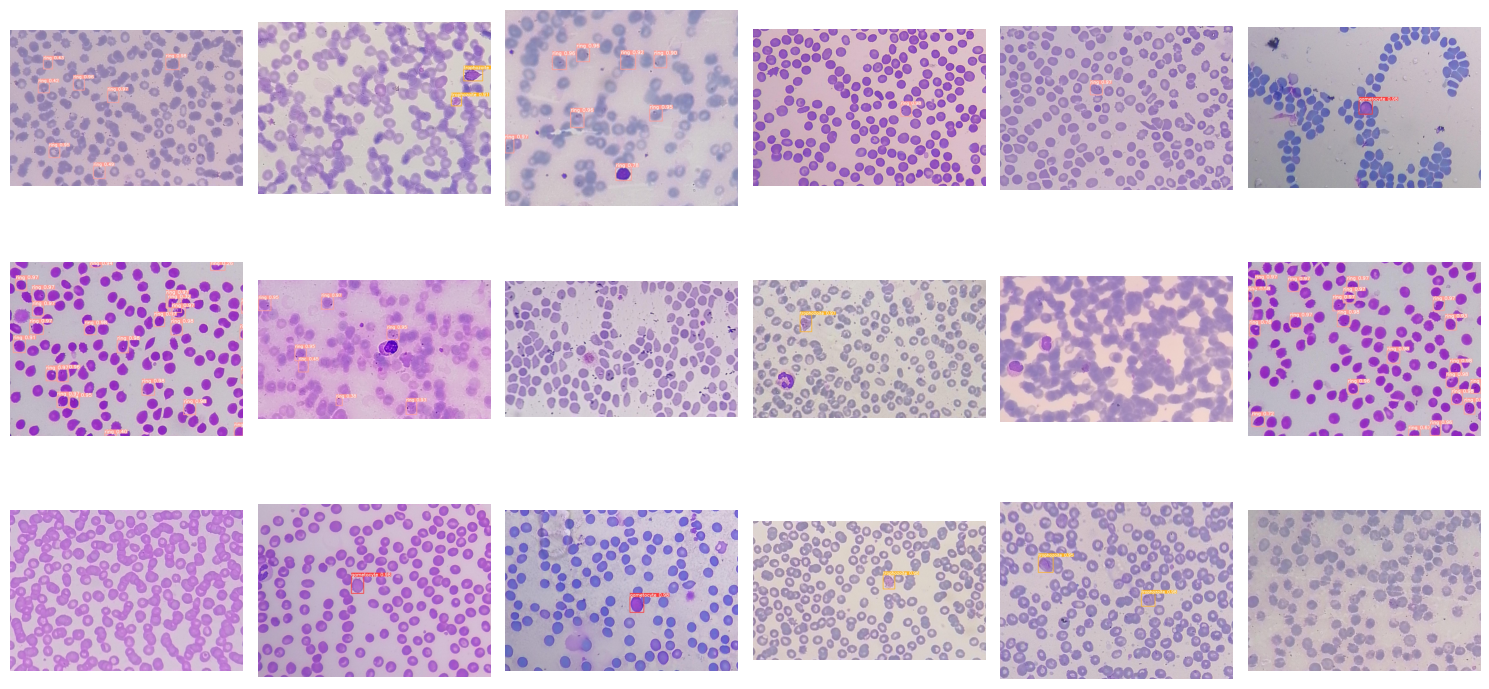

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

image_dir = "/content/yolov3/runs/detect/exp"
image_files = os.listdir(image_dir)

fig, axes = plt.subplots(3, 6, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    if i < len(image_files):
        image_file = image_files[i]
        image_path = os.path.join(image_dir, image_file)
        img = Image.open(image_path)
        ax.imshow(img)
        ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
!python val.py --weights last.pt --data data.yaml --task test --img 800

val: data=data.yaml, weights=['last.pt'], batch_size=32, imgsz=800, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-114-gecd5112 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 190 layers, 61513585 parameters, 0 gradients, 154.6 GFLOPs
test: Scanning /content/yolov3/test/labels... 18 images, 0 backgrounds, 0 corrupt: 100% 18/18 [00:00<00:00, 767.84it/s]
test: New cache created: /content/yolov3/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:06<00:00,  6.04s/it]
                   all         18         87       0.97      0.727      0.839      0.708
            gametocyte         18          3      0.962          1      0.995      0.897
        

## Custom Training

We can train our last model on more epochs trying different hyperparameter.

For changing hyperparameter you can change the values in hyp.scratch-med.yaml

In [ ]:
!python train.py --img 800 --batch 8 --epochs 1 --data data.yaml --weights last.pt --cache --hyp ./data/hyps/hyp.scratch-med.yaml

### On validation data

In [ ]:
!python val.py --weights path/to/your_weights --data data.yaml --img 800 --half